In [1]:
from IPython.core.display import HTML
HTML("<style>.container { width:90% !important; }</style>")

In [2]:
import new_functions as fn
fn = reload(fn)
import functions as fn2
fn2 = reload(fn2)

/Users/mfisherlevine/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
import os
import numpy as np
import lsst.daf.persistence as dafPersist
import lsst.afw.display.ds9 as ds9
# import lsst.afw.display as afwDisplay
import lsst.afw.image as afwImage

import lsst.afw.geom as afwGeom
import lsst.afw.detection as afwDetect
import pyfits as pf
%matplotlib inline
import scipy
import scipy.ndimage as ndimage
import pylab as plt
import sys

N_AMPS = 16
HISTMIN = -1000
HISTMAX = 10000
NBINS = HISTMAX - HISTMIN + 1

In [8]:
# files = fn.GetFiles('/Users/mfisherlevine/Desktop/fe55_113-03/','*.fits')
# files = fn.GetFiles('/Users/mfisherlevine/Downloads/113-03/fe55/15041/','*fe55_bias*.fits')
files = fn.GetFiles('/Users/mfisherlevine/Downloads/113-03/fe55/15041/','*fe55_fe55*.fits')


Found 25 matching files


In [9]:
exp_total = 0.
for filenum, filename in enumerate(files):
#     if filenum%1==0: print 'Processing file %s of %s'%(filenum, len(files)); sys.stdout.flush()
    f = pf.open(filename)
    exptime = f[0].header['EXPTIME']
    exp_total += exptime
    print 'Exptime = %s s for %s'%(exptime, filename)
    f.close()
print 'Total exposure time = %s hours'%(exp_total/3600.)

Exptime = 4.0 s for /Users/mfisherlevine/Downloads/113-03/fe55/15041/E2V-113-03_fe55_fe55_001_20160130204151.fits
Exptime = 4.0 s for /Users/mfisherlevine/Downloads/113-03/fe55/15041/E2V-113-03_fe55_fe55_002_20160130204215.fits
Exptime = 4.0 s for /Users/mfisherlevine/Downloads/113-03/fe55/15041/E2V-113-03_fe55_fe55_003_20160130204234.fits
Exptime = 4.0 s for /Users/mfisherlevine/Downloads/113-03/fe55/15041/E2V-113-03_fe55_fe55_004_20160130204259.fits
Exptime = 4.0 s for /Users/mfisherlevine/Downloads/113-03/fe55/15041/E2V-113-03_fe55_fe55_005_20160130204319.fits
Exptime = 4.0 s for /Users/mfisherlevine/Downloads/113-03/fe55/15041/E2V-113-03_fe55_fe55_006_20160130204345.fits
Exptime = 4.0 s for /Users/mfisherlevine/Downloads/113-03/fe55/15041/E2V-113-03_fe55_fe55_007_20160130204409.fits
Exptime = 4.0 s for /Users/mfisherlevine/Downloads/113-03/fe55/15041/E2V-113-03_fe55_fe55_008_20160130204432.fits
Exptime = 4.0 s for /Users/mfisherlevine/Downloads/113-03/fe55/15041/E2V-113-03_fe55_fe5

In [10]:
hists = [np.zeros(NBINS, dtype=np.float64) for _ in range(N_AMPS+1)]
for filenum, filename in enumerate(files):
    if filenum%10==0: print 'Processing file %s of %s'%(filenum, len(files)); sys.stdout.flush()
    f = pf.open(filename)
    for amp in xrange(1,1+N_AMPS):
        n_rows, n_cols = f[amp].data.shape
        data = f[amp].data[:,523:]
#         ds9.mtv(afwImage.ImageF(data))
#         break
        if (amp==5) and (filenum==0):
            print 'sent image'
            ds9.mtv(afwImage.ImageF(f[amp].data[:,10:]))
        oscan = np.median(f[amp].data[:,523:n_cols])
#         data -= oscan
#         fn2.ShowSpot(data[:,1:513], half_stretch=3)
#         break
        hist_vals = ndimage.histogram(data, HISTMIN, HISTMAX, NBINS)
        hists[amp] += hist_vals
    f.close()

Processing file 0 of 25
sent image
Processing file 10 of 25
Processing file 20 of 25


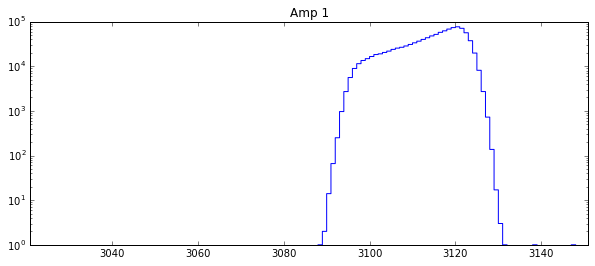

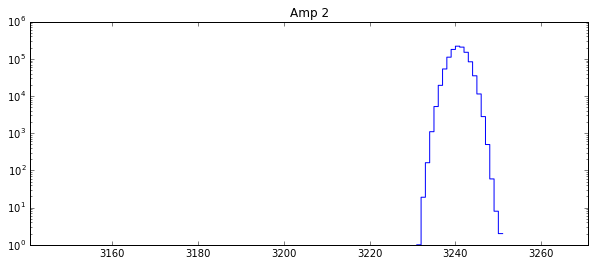

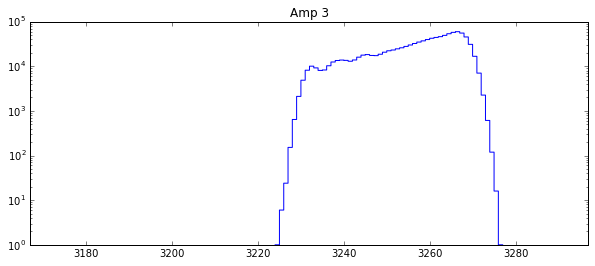

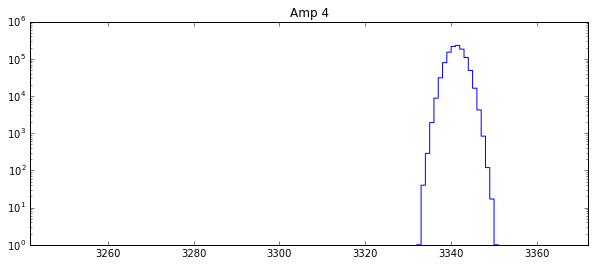

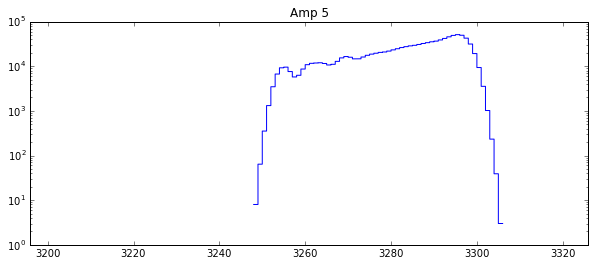

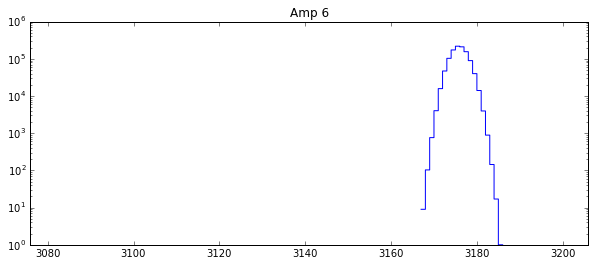

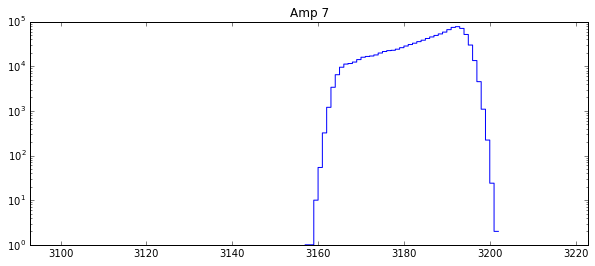

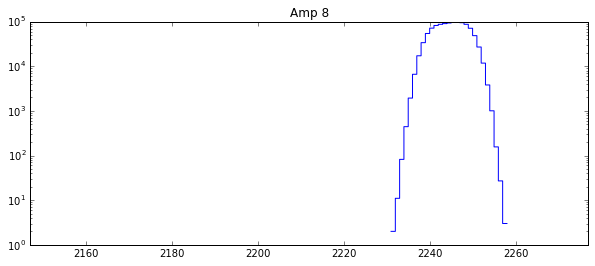

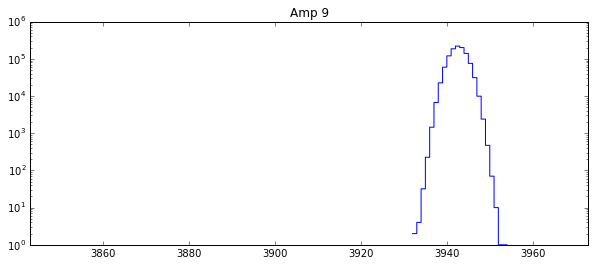

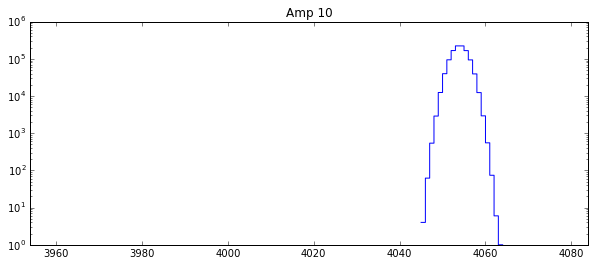

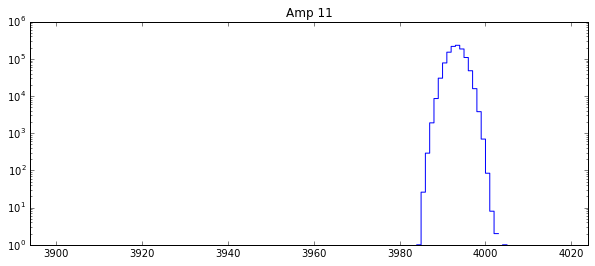

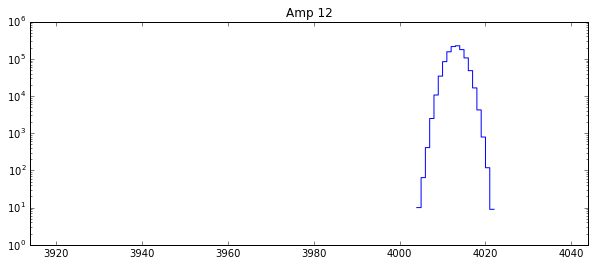

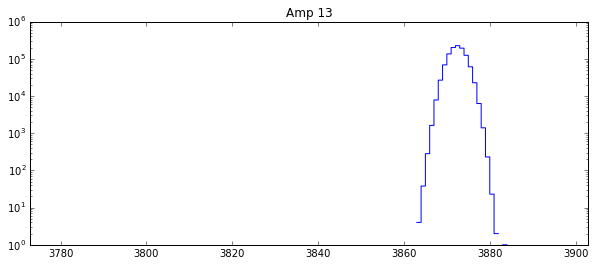

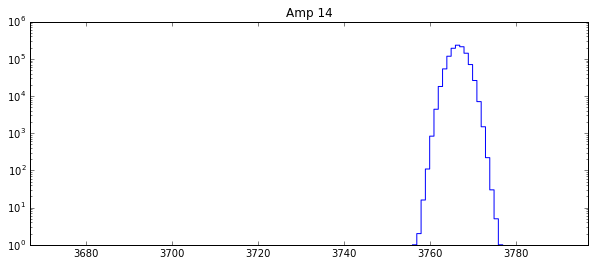

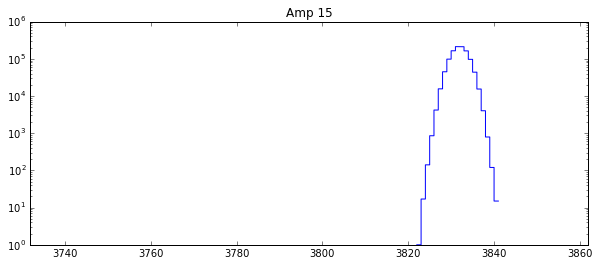

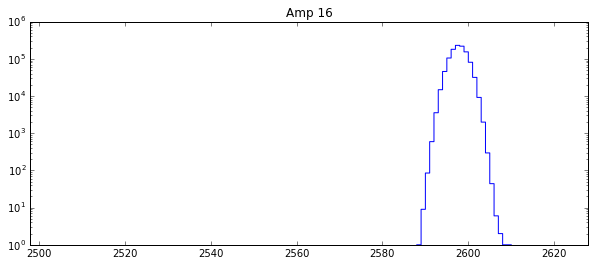

In [11]:
for amp in range(1,N_AMPS+1):
    fig = plt.figure(figsize=(10,4))
    ax = plt.subplot(111)
    xpoints = np.linspace(HISTMIN, HISTMAX, NBINS)
#     plt.semilogy(xpoints, hists[amp])
    plt.step(xpoints, hists[amp])
#     print hists[amp][fn2.indexOfMax(hists[amp])-30:fn2.indexOfMax(hists[amp])+10]
#     break
    ax.semilogy()
#     plt.xlim((-50,50))
#     plt.xlim((-50,1000))
    plt.xlim(fn2.indexOfMax(hists[amp])+HISTMIN - 100, fn2.indexOfMax(hists[amp])+HISTMIN + 30)
    plt.title('Amp %s'%(amp))
    plt.show()

In [12]:
hists = [np.zeros(NBINS, dtype=np.float64) for _ in range(N_AMPS+1)]

n_sigma_thr = 6.

for filenum, filename in enumerate(files):
    if filenum%10==0: print 'Processing file %s of %s'%(filenum, len(files)); sys.stdout.flush()
    f = pf.open(filename)
    for amp in xrange(1,1+N_AMPS):
        n_rows, n_cols = f[amp].data.shape
        data = f[amp].data[:,1:513]
        oscan = np.median(f[amp].data[:,513:n_cols])
        data -= oscan
        mean, sigma = fn2.getClippedMeanandStddev(data,nsig=3)
        hist_vals = ndimage.histogram(data[data >= mean + (n_sigma_thr*sigma)], HISTMIN, HISTMAX, NBINS)
        hists[amp] += hist_vals
    f.close()

Processing file 0 of 25
Processing file 10 of 25
Processing file 20 of 25


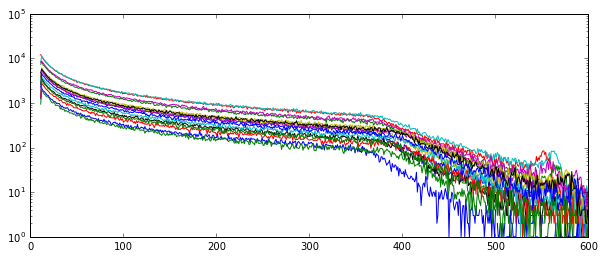

In [13]:
fig = plt.figure(figsize=(10,4))

for amp in range(1,N_AMPS+1):
    xpoints = np.linspace(HISTMIN, HISTMAX, NBINS)
    plt.semilogy(xpoints, hists[amp])
    plt.xlim((0,600))
#     plt.title('Amp %s'%(amp-1))
#     plt.show()

In [ ]:
# hists = [np.zeros(NBINS, dtype=np.float64) for _ in range(N_AMPS+1)]
# n_sigma_thr = 6.

# THRESHOLD = 40
# N_PIX_MIN = 1
# GROW = 1
# ISOTROPIC = True
# VERBOSE = False

# fluxes = [[] for _ in range(N_AMPS)]

# for filenum, filename in enumerate(files):
#     if filenum%10==0: print 'Processing file %s of %s'%(filenum, len(files)); sys.stdout.flush()
#     f = pf.open(filename)
#     for amp in xrange(1,1+N_AMPS):
#         n_rows, n_cols = f[amp].data.shape
#         data = f[amp].data[:,1:513]
#         oscan = np.median(f[amp].data[:,513:n_cols])
#         data -= oscan
        
        
#         image = afwImage.ImageF(data)
#         maskedImg = afwImage.MaskedImageF(image)
#         exposure = afwImage.ExposureF(maskedImg)

#         threshold = afwDetect.Threshold(THRESHOLD, afwDetect.Threshold.VALUE)
#         footPrintSet = afwDetect.FootprintSet(exposure.getMaskedImage(), threshold, "DETECTED", N_PIX_MIN)
#         footPrintSet = afwDetect.FootprintSet(footPrintSet, GROW, ISOTROPIC)

#         footPrints = footPrintSet.getFootprints()
#         if VERBOSE: print "Found %s footprints in amp %s of file %s"%(footPrints.size(), amp, filename)
# #         total_found += footPrints.size()

# #         if footPrints.size() >= 1000: # files with bright defects cause all sorts of problems
# #             print "Bad file - skipping amp %s in %s"%(amp, filename)
# #             continue

#         for pointnum, footprint in enumerate(footPrints):
#             flux = fn2.SumFootprintPixels(footprint,image)
#             fluxes[amp-1].append(flux)
#     f.close()

In [14]:
hists = [np.zeros(NBINS, dtype=np.float64) for _ in range(N_AMPS+1)]

n_sigma_thr = 4.
N_PIX_MIN = 2
GROW = 0
ISOTROPIC = True
VERBOSE = False

thrs = []

fluxes = [[] for _ in range(N_AMPS)]

for filenum, filename in enumerate(files):
    if filenum%10==0: print 'Processing file %s of %s'%(filenum, len(files)); sys.stdout.flush()
    f = pf.open(filename)
    for amp in xrange(1,1+N_AMPS):
        n_rows, n_cols = f[amp].data.shape
        data = f[amp].data[:,1:513]
        oscan = np.median(f[amp].data[:,513:n_cols])
        data -= oscan
        
        image = afwImage.ImageF(data)
        maskedImg = afwImage.MaskedImageF(image)
        exposure = afwImage.ExposureF(maskedImg)

        mean, sigma = fn2.getClippedMeanandStddev(data, nsig=5)
        THRESHOLD = mean + (n_sigma_thr*sigma)
        thrs.append(THRESHOLD)
        
        threshold = afwDetect.Threshold(THRESHOLD, afwDetect.Threshold.VALUE)
        footPrintSet = afwDetect.FootprintSet(exposure.getMaskedImage(), threshold, "DETECTED", N_PIX_MIN)
        footPrintSet = afwDetect.FootprintSet(footPrintSet, GROW, ISOTROPIC)

        footPrints = footPrintSet.getFootprints()
        if VERBOSE: print "Found %s footprints in amp %s of file %s"%(footPrints.size(), amp, filename)
#         total_found += footPrints.size()

#         if footPrints.size() >= 1000: # files with bright defects cause all sorts of problems
#             print "Bad file - skipping amp %s in %s"%(amp, filename)
#             continue

        for pointnum, footprint in enumerate(footPrints):
            flux = fn2.SumFootprintPixels(footprint,image)
            fluxes[amp-1].append(flux)
    f.close()

Processing file 0 of 25
Processing file 10 of 25
Processing file 20 of 25


In [15]:
from scipy.signal import argrelmax 
from scipy.signal import find_peaks_cwt

In [16]:
def ThresholdList(input_list, threshold, default_value=0, return_as_array=False):
    if return_as_array: return np.asarray([val if val>=threshold else default_value for val in input_list])
    return [val if val>=threshold else default_value for val in input_list]

Binsize = 1.0
(array([ 50, 186, 240, 354, 410]),)


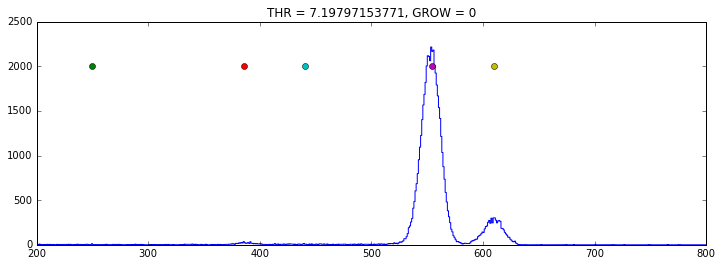

(array([195, 232, 279, 418]),)


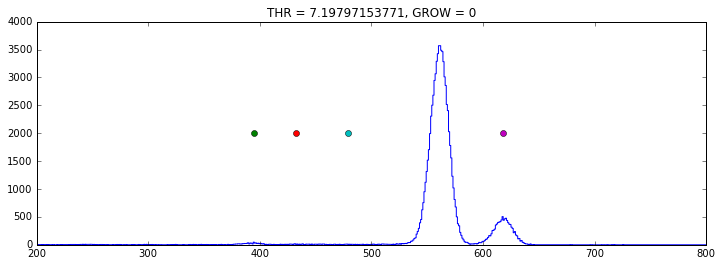

(array([ 36, 128, 187, 219, 255, 346, 401]),)


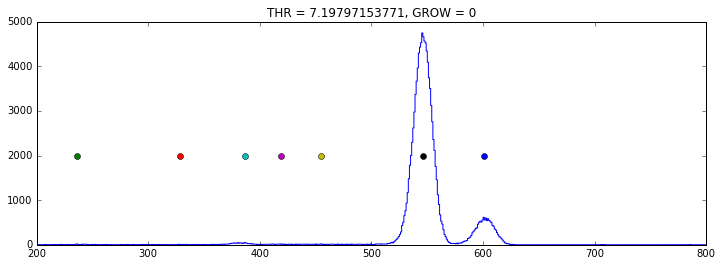

(array([ 50, 189, 225, 252, 358, 411]),)


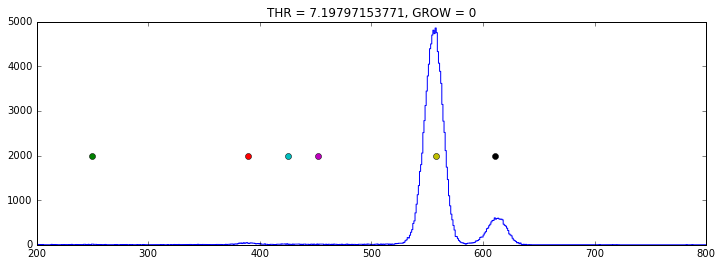

(array([188, 223, 355, 411]),)


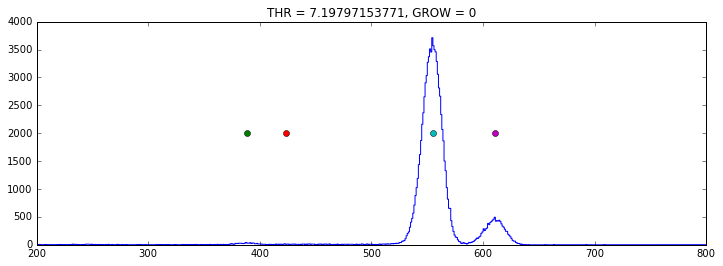

(array([188, 224, 356, 414]),)


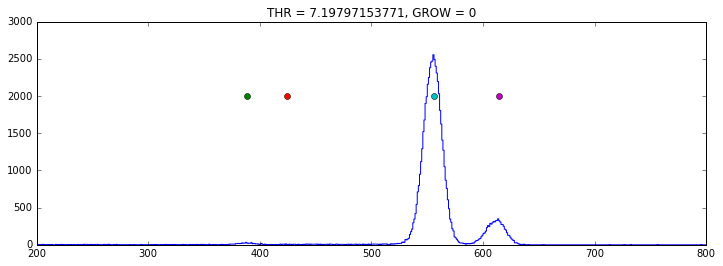

(array([190, 354, 411]),)


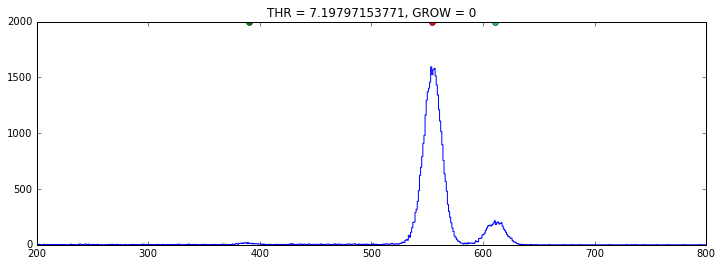

(array([331, 384]),)


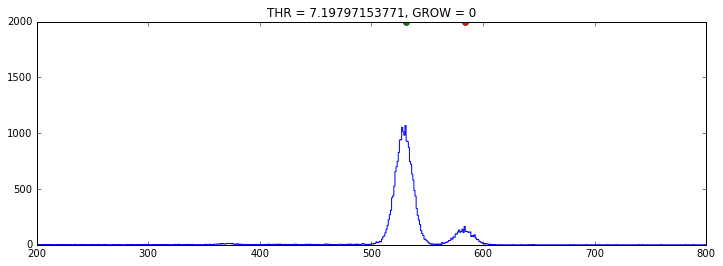

(array([193, 366, 426]),)


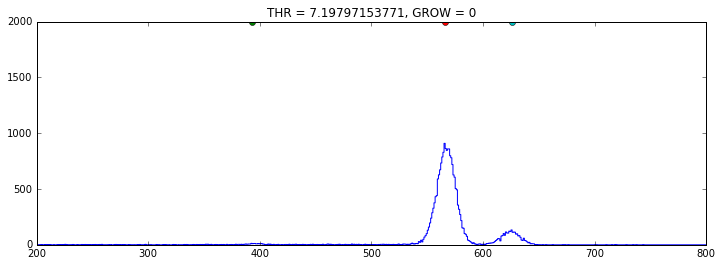

(array([206, 381]),)


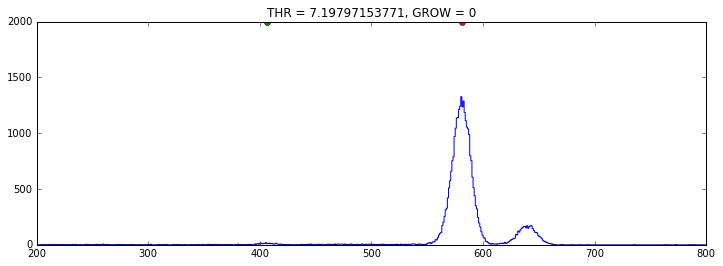

(array([209, 372, 433]),)


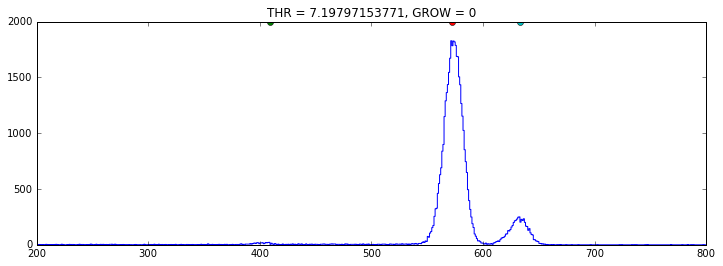

(array([210, 381, 442]),)


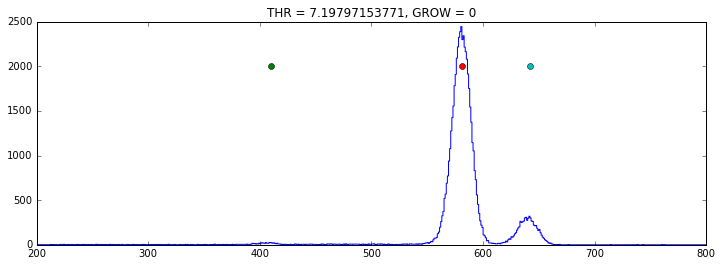

(array([199, 372, 431]),)


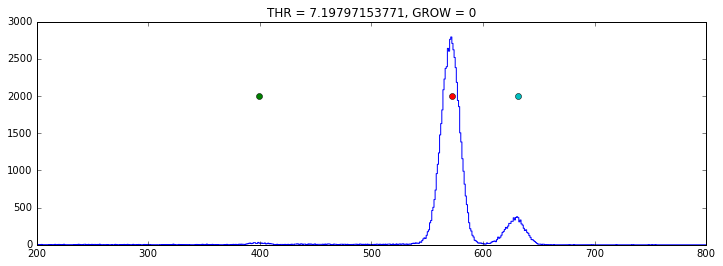

(array([200, 260, 297, 370, 429]),)


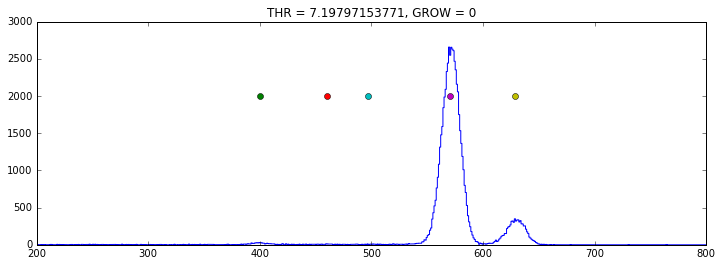

(array([208, 273, 380, 442]),)


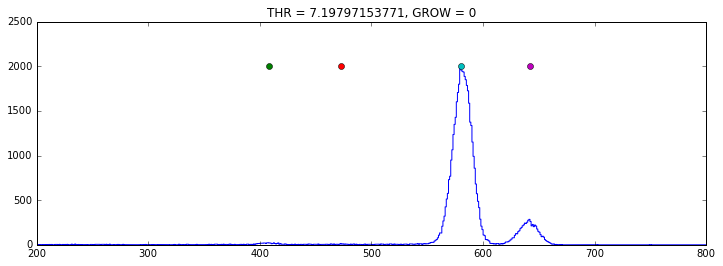

(array([373, 430]),)


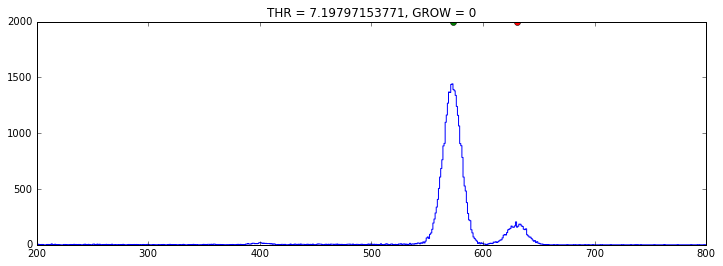

In [17]:
HISTMIN = 200.
HISTMAX = 800.
NBINS = HISTMAX - HISTMIN + 1

xpoints = np.linspace(HISTMIN, HISTMAX, NBINS)
print 'Binsize = %s'%(xpoints[1]-xpoints[0])

for amp in range(N_AMPS):
    fig = plt.figure(figsize=(12,4))
    
    histvals = ndimage.histogram(np.asarray(fluxes[amp]),HISTMIN, HISTMAX, NBINS)
#     peaks = find_peaks_cwt(histvals, widths=np.array([10]))#, wavelet=scipy.signal.wavelets.morlet)
#     peaks = argrelmax(ThresholdList(hist_vals, 0.1*max(hist_vals),return_as_array=True), order=20)
    peaks = argrelmax(np.asarray([val if val>=0.1*max(hist_vals) else 0 for val in histvals]), order=20)
#     for a,b in zip(his\t_vals, ThresholdList(hist_vals, 0.1*max(hist_vals),return_as_array=True)):
#         print a,b
    
    print peaks
    
    plt.step(xpoints, histvals)
    plt.plot([peak + HISTMIN for peak in peaks], [2000. for _ in range(len(peaks))], 'o')
    #     plt.semilogy(xpoints, histvals)
#     plt.xlim((-200,12000))
    plt.title('THR = %s, GROW = %s'%(THRESHOLD, GROW))
    plt.show()


In [18]:
def FitGaussian(binned_data, std_dev, initial_pars=None, return_fitted_points=False, n_fitted_points=1000, print_values=False, plot=False):
    '''Data should be histogrammed, with the form data[hist_vals,]
    initial_pars takes the form [A, mu, sigma]'''
    from scipy.optimize import curve_fit
    def gauss(x, *p):
        A, mu, sigma = p
        return A*np.exp(-(x-mu)**2/(2.*sigma**2))
    
    bin_centres = binned_data[:,0]
    bin_values  = binned_data[:,1]

    if initial_pars is None:
        max_bin_value = max(binned_data[:,1])
        max_bin = np.where(binned_data[:,1]==max_bin_value)[0][0]
        max_bin_center = binned_data[max_bin,0]
        a0     = max_bin_value
        mu0    = max_bin_center
        sigma0 = std_dev
        initial_pars = [a0, mu0, sigma0]

    if print_values: print 'Initial parameters = %.2f, %.2f, %.2f'%(initial_pars[0],initial_pars[1],initial_pars[2])
    coeff, var_matrix = curve_fit(gauss, bin_centres, bin_values, p0=initial_pars, sigma=[np.sqrt(_) if _>=1 else 1 for _ in bin_values])
    if print_values: print 'Fitted parameters  = %.2f, %.2f, %.2f'%(coeff[0],coeff[1],coeff[2])
    
    if print_values:
        print 'Mean  = %.5f +/- %.6f'%(coeff[1], var_matrix[1,1])
        print 'Sigma = %.5f +/- %.6f'%(coeff[2], var_matrix[2,2])

    xpoints = np.linspace(min(bin_centres), max(bin_centres),n_fitted_points)
    fitted_points = gauss(xpoints, *coeff)
    
    if plot:
        plt.plot(binned_data[:,0], binned_data[:,1], 'x')
        plt.plot(xpoints, fitted_points, label='Fit')
        plt.show()
    
    if return_fitted_points:
        return xpoints, fitted_points, coeff
    return coeff

def FitDoubleGaussian(binned_data, std_dev, second_gaus_offset=10, initial_pars=None, return_fitted_points=False, n_fitted_points=1000, print_values=False, plot=False):
    '''Data should be histogrammed, with the form data[hist_vals,]
    initial_pars takes the form [A, mu, sigma]'''
    from scipy.optimize import curve_fit
    def double_gauss(x, *p):
        A, mu, sigma, A2, mu2, sigma2 = p
        return A*np.exp(-(x-mu)**2/(2.*sigma**2)) + A2*np.exp(-(x-mu2)**2/(2.*sigma2**2))
    
    bin_centres = binned_data[:,0]
    bin_values  = binned_data[:,1]

    if initial_pars is None:
        max_bin_value = max(binned_data[:,1])
        max_bin = np.where(binned_data[:,1]==max_bin_value)[0][0]
        max_bin_center = binned_data[max_bin,0]
        a0     = max_bin_value
        mu0    = max_bin_center
        sigma0 = std_dev
        a20    = max_bin_value * 0.12
        mu20   = mu0 + second_gaus_offset
        sigma20 = sigma0
        initial_pars = [a0, mu0, sigma0, a20, mu20, sigma20]

    if print_values: print 'Initial parameters = %.2f, %.2f, %.2f, %.2f, %.2f, %.2f'%(initial_pars[0],initial_pars[1],initial_pars[2],initial_pars[3],initial_pars[4],initial_pars[5])
    coeff, var_matrix = curve_fit(double_gauss, bin_centres, bin_values, p0=initial_pars, sigma=[np.sqrt(_) if _>=1 else 1 for _ in bin_values])
    if print_values: print 'Fitted parameters  = %.2f, %.2f, %.2f, %.2f, %.2f, %.2f'%(coeff[0],coeff[1],coeff[2],coeff[3],coeff[4],coeff[5])
    
    if print_values:
        print 'Mean  = %.5f +/- %.6f'%(coeff[1], var_matrix[1,1])
        print 'Sigma = %.5f +/- %.6f'%(coeff[2], var_matrix[2,2])

    xpoints = np.linspace(bin_centres[0], bin_centres[-1],n_fitted_points)
    fitted_points = double_gauss(xpoints, *coeff)
    
    if plot:
        plt.plot(binned_data[:,0], binned_data[:,1], 'x')
        plt.plot(xpoints, fitted_points, '-r', label='Fit')
        plt.show()
    
    if return_fitted_points:
        return xpoints, fitted_points, coeff
    return coeff

    

Binsize = 1.0
Initial parameters = 2215.00, 554.50, 8.00, 265.80, 604.50, 8.00
Fitted parameters  = 2160.39, 554.08, 8.47, 282.88, 610.07, 8.71
Mean  = 554.08220 +/- 0.005453
Sigma = 8.47149 +/- 0.002936


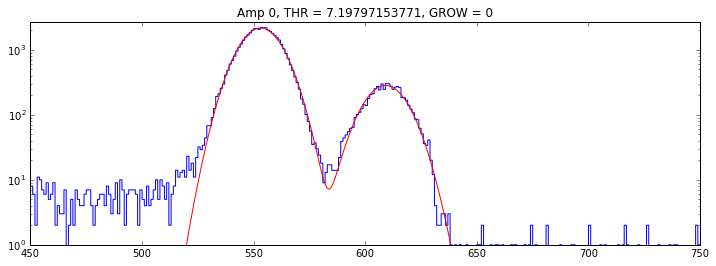

Initial parameters = 3568.00, 561.50, 8.00, 428.16, 611.50, 8.00
Fitted parameters  = 3483.90, 561.81, 8.18, 459.88, 618.72, 8.43
Mean  = 561.80549 +/- 0.004488
Sigma = 8.18138 +/- 0.002386


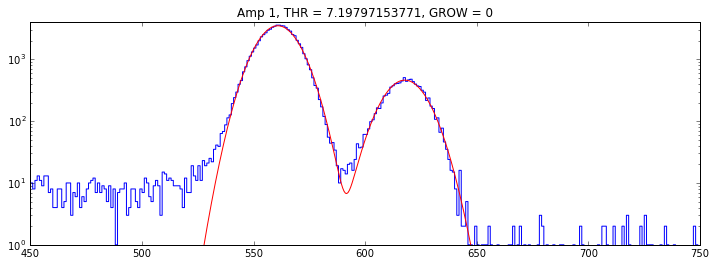

Initial parameters = 4745.00, 546.50, 8.00, 569.40, 596.50, 8.00
Fitted parameters  = 4652.86, 546.89, 8.19, 591.22, 602.36, 8.56
Mean  = 546.89383 +/- 0.004422
Sigma = 8.19206 +/- 0.002349


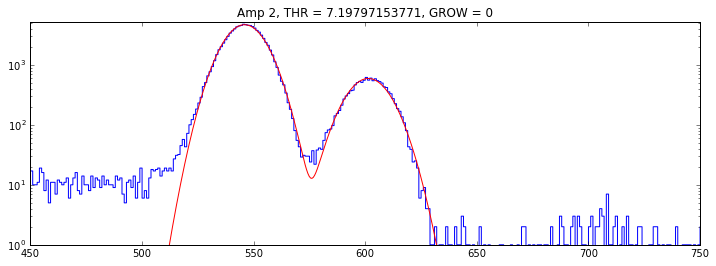

Initial parameters = 4856.00, 558.50, 8.00, 582.72, 608.50, 8.00
Fitted parameters  = 4754.28, 556.69, 8.28, 602.87, 613.07, 8.59
Mean  = 556.68777 +/- 0.004591
Sigma = 8.28210 +/- 0.002452


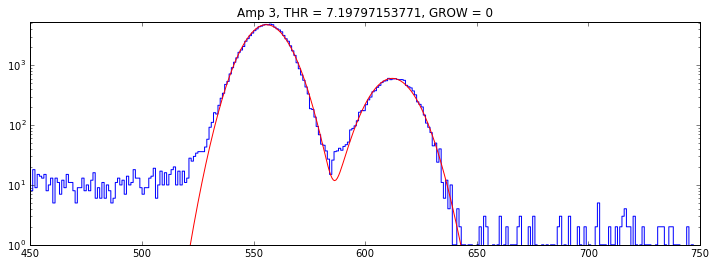

Initial parameters = 3711.00, 555.50, 8.00, 445.32, 605.50, 8.00
Fitted parameters  = 3594.28, 555.05, 8.67, 453.56, 611.15, 9.10
Mean  = 555.05319 +/- 0.004877
Sigma = 8.66644 +/- 0.002616


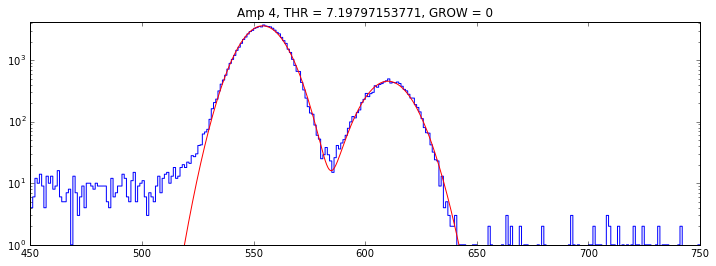

Initial parameters = 2554.00, 556.50, 8.00, 306.48, 606.50, 8.00
Fitted parameters  = 2494.65, 555.71, 8.24, 330.78, 612.06, 8.52
Mean  = 555.70618 +/- 0.004651
Sigma = 8.23503 +/- 0.002501


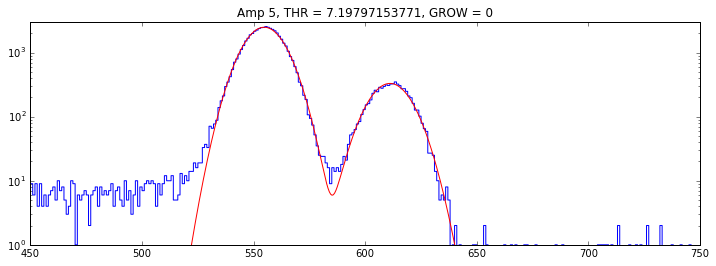

Initial parameters = 1594.00, 554.50, 8.00, 191.28, 604.50, 8.00
Fitted parameters  = 1540.42, 555.77, 8.30, 206.13, 611.94, 8.47
Mean  = 555.76831 +/- 0.005034
Sigma = 8.30085 +/- 0.002762


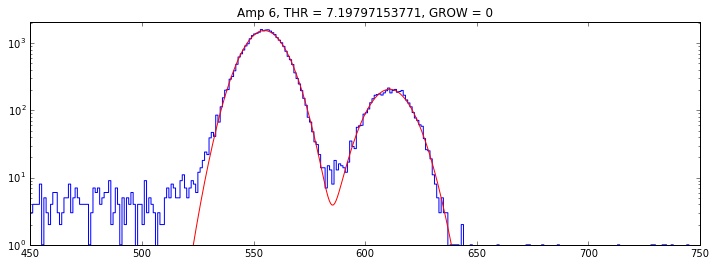

Initial parameters = 1069.00, 531.50, 8.00, 128.28, 581.50, 8.00
Fitted parameters  = 1002.44, 530.01, 7.83, 129.97, 583.92, 8.30
Mean  = 530.01254 +/- 0.005138
Sigma = 7.83038 +/- 0.002785


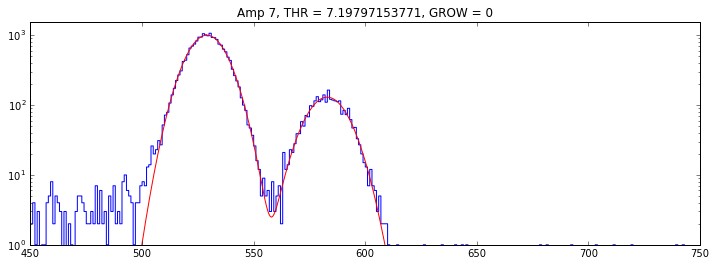

Initial parameters = 909.00, 566.50, 8.00, 109.08, 616.50, 8.00
Fitted parameters  = 860.61, 567.87, 8.34, 115.48, 625.52, 8.46
Mean  = 567.86937 +/- 0.006510
Sigma = 8.33505 +/- 0.003519


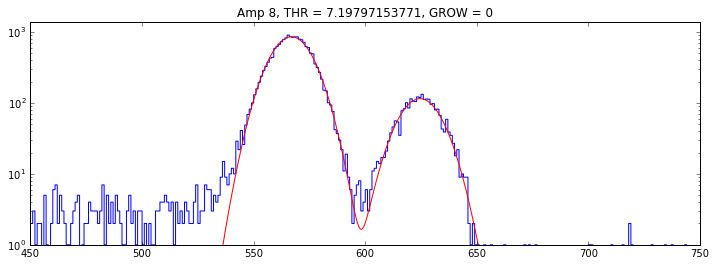

Initial parameters = 1327.00, 581.50, 8.00, 159.24, 631.50, 8.00
Fitted parameters  = 1250.45, 581.58, 8.38, 166.57, 640.39, 8.67
Mean  = 581.57528 +/- 0.005435
Sigma = 8.38033 +/- 0.002938


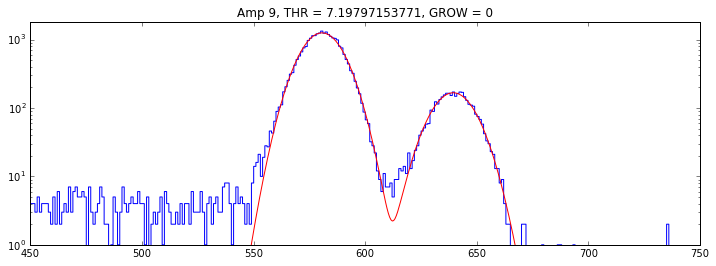

Initial parameters = 1828.00, 572.50, 8.00, 219.36, 622.50, 8.00
Fitted parameters  = 1798.76, 574.34, 8.28, 229.65, 632.59, 8.52
Mean  = 574.33594 +/- 0.005094
Sigma = 8.28343 +/- 0.002715


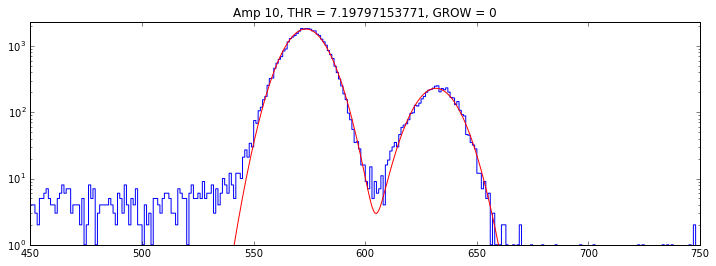

Initial parameters = 2444.00, 581.50, 8.00, 293.28, 631.50, 8.00
Fitted parameters  = 2350.02, 581.53, 8.42, 297.24, 640.54, 8.83
Mean  = 581.53309 +/- 0.005090
Sigma = 8.41986 +/- 0.002762


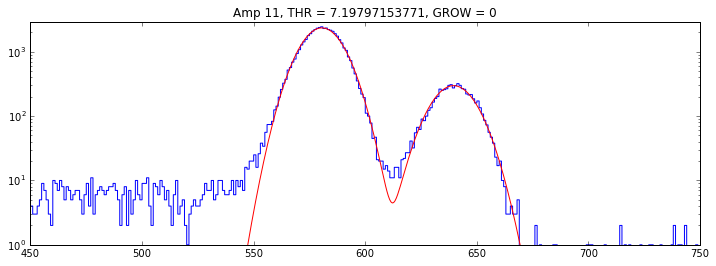

Initial parameters = 2793.00, 572.50, 8.00, 335.16, 622.50, 8.00
Fitted parameters  = 2713.60, 571.57, 8.33, 349.75, 629.36, 8.72
Mean  = 571.56824 +/- 0.004944
Sigma = 8.32595 +/- 0.002644


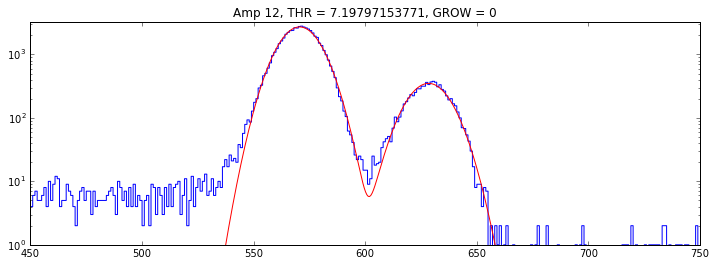

Initial parameters = 2657.00, 570.50, 8.00, 318.84, 620.50, 8.00
Fitted parameters  = 2625.28, 572.12, 8.09, 335.65, 630.23, 8.39
Mean  = 572.11755 +/- 0.004904
Sigma = 8.08906 +/- 0.002564


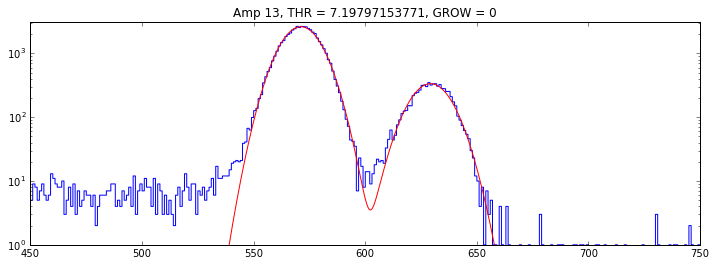

Initial parameters = 2011.00, 580.50, 8.00, 241.32, 630.50, 8.00
Fitted parameters  = 1955.60, 582.43, 8.40, 255.26, 641.30, 8.83
Mean  = 582.43094 +/- 0.005699
Sigma = 8.40480 +/- 0.003025


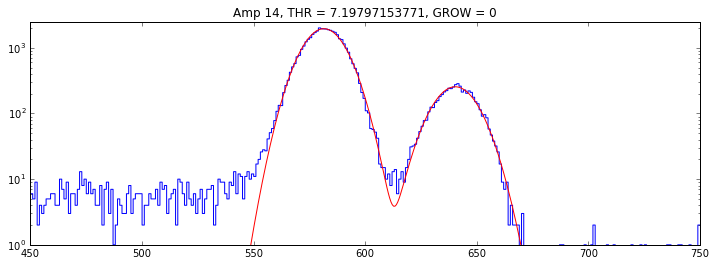

Initial parameters = 1442.00, 573.50, 8.00, 173.04, 623.50, 8.00
Fitted parameters  = 1403.62, 573.13, 8.21, 180.37, 630.93, 8.80
Mean  = 573.13123 +/- 0.005600
Sigma = 8.20563 +/- 0.002982


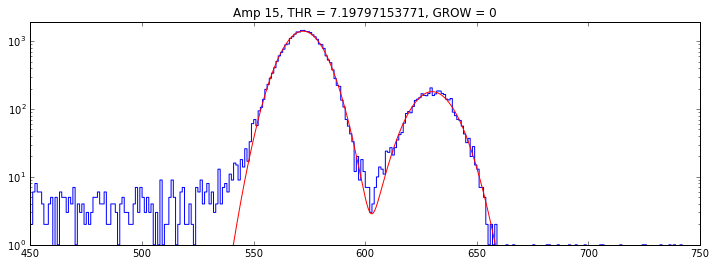

In [19]:
HISTMIN = 200.
HISTMAX = 800.
NBINS = HISTMAX - HISTMIN + 1

xpoints = np.linspace(HISTMIN, HISTMAX, NBINS)
print 'Binsize = %s'%(xpoints[1]-xpoints[0])

k_alpha_peaks = []
k_beta_peaks = []

for amp in range(N_AMPS):
    fig = plt.figure(figsize=(12,4))
    ax = plt.subplot(111)
    
    histvals = ndimage.histogram(np.asarray(fluxes[amp]),HISTMIN, HISTMAX, NBINS)
#     peaks = argrelmax(np.asarray([val if val>=0.1*max(hist_vals) else 0 for val in histvals]), order=20)
    bin_centers = xpoints + ((xpoints[1]-xpoints[0])/2.)
    
    fit_data = np.ndarray((len(histvals),2))
    fit_data[:,1] = histvals
    fit_data[:,0] = bin_centers
    
    xpoints_fit, fitted_points, fit_pars = FitDoubleGaussian(fit_data, 8., second_gaus_offset=50, print_values=True, plot=False, return_fitted_points=True)
#     xpoints_fit, fitted_points, fit_pars = FitGaussian(fit_data, 8., print_values=True, plot=False, return_fitted_points=True)
    k_alpha_peaks.append(fit_pars[1])
    k_beta_peaks.append(fit_pars[4])

    plt.step(xpoints, histvals)
    plt.plot(xpoints_fit-1, fitted_points, '-r')

    ax.set_yscale("log", nonposy='clip')


#     plt.plot([peak + HISTMIN for peak in peaks], [2000. for _ in range(len(peaks))], 'o')
    plt.xlim((450,750))
    plt.ylim((1,max(histvals)+500))

    plt.title('Amp %s, THR = %s, GROW = %s'%(amp, THRESHOLD, GROW))
    plt.show()
#     break


In [20]:
K_ALPHA_1   = 5898.75
K_ALPHA_2   = 5887.65
K_ALPHA_NOM = ((1.97561*K_ALPHA_1) + (K_ALPHA_2)) / (2.97561) # weighting by the ratio of the two lines
K_BETA      = 6490.45
DELTA_E     = K_ALPHA_NOM - K_BETA

In [21]:
temp_in_kelvin = 173.
PAIR_ENERGY = 3.73 - (0.000131*temp_in_kelvin)
electrons_per_K_ALPHA = K_ALPHA_NOM/PAIR_ENERGY
electrons_per_E_DELTA = (DELTA_E/PAIR_ENERGY)
print 'Pair creation energy = %s'%PAIR_ENERGY
print '# e- per K_alpha hit = %s'%(electrons_per_K_ALPHA)

Pair creation energy = 3.707337
# e- per K_alpha hit = 1590.09544383


In [22]:
gains = []
for amp in range(N_AMPS):
    gain = electrons_per_K_ALPHA/k_alpha_peaks[amp]
    gains.append(gain)
    print 'Amp %2i gain = %.3f'%(amp, gain)

print '\n*********\n'

gains_delta_e = []
for amp in range(N_AMPS):
    gain = electrons_per_E_DELTA/(k_alpha_peaks[amp] - k_beta_peaks[amp])
    gains_delta_e.append(gain)
    print 'Amp %2i gain = %.3f'%(amp, gain)

Amp  0 gain = 2.870
Amp  1 gain = 2.830
Amp  2 gain = 2.908
Amp  3 gain = 2.856
Amp  4 gain = 2.865
Amp  5 gain = 2.861
Amp  6 gain = 2.861
Amp  7 gain = 3.000
Amp  8 gain = 2.800
Amp  9 gain = 2.734
Amp 10 gain = 2.769
Amp 11 gain = 2.734
Amp 12 gain = 2.782
Amp 13 gain = 2.779
Amp 14 gain = 2.730
Amp 15 gain = 2.774

*********

Amp  0 gain = 2.869
Amp  1 gain = 2.822
Amp  2 gain = 2.896
Amp  3 gain = 2.849
Amp  4 gain = 2.863
Amp  5 gain = 2.850
Amp  6 gain = 2.859
Amp  7 gain = 2.979
Amp  8 gain = 2.786
Amp  9 gain = 2.731
Amp 10 gain = 2.757
Amp 11 gain = 2.722
Amp 12 gain = 2.779
Amp 13 gain = 2.764
Amp 14 gain = 2.728
Amp 15 gain = 2.779


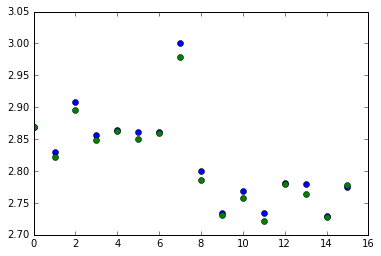

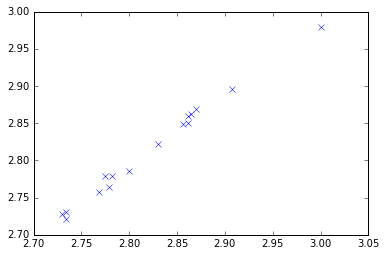

In [23]:
plt.plot(gains, 'o')
plt.plot(gains_delta_e, 'o')
plt.show()
plt.plot(gains, gains_delta_e, 'x')

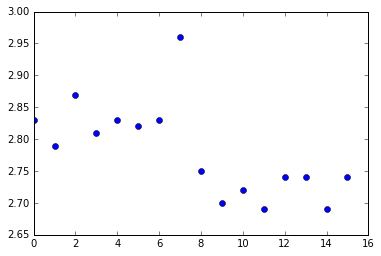

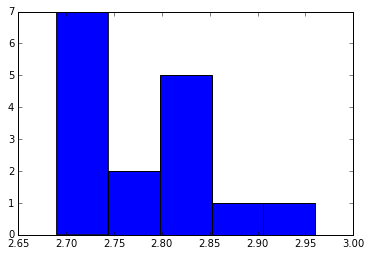

In [24]:
BNL_amp_gains = [2.83, 2.79, 2.87, 2.81, 2.83,2.82, 2.83, 2.96, 2.75, 2.70, 2.72, 2.69, 2.74, 2.74, 2.69, 2.74]
plt.plot(BNL_amp_gains, 'o')
plt.show()
ys, xs, patches = plt.hist(BNL_amp_gains, bins=5)

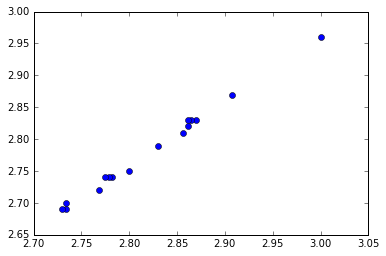

In [31]:
plt.plot(gains, BNL_amp_gains, 'o')

In [26]:
yuki_gains =  [3.885024,
            3.848112,
            3.848112,
            3.848112,
            3.848112,
            3.848112,
            3.866480,
            3.794040,
            3.903747,
            3.941740,
            3.866480,
            3.980479,
            3.866480,
            3.941740,
            3.866480,
            3.866480]#ch16


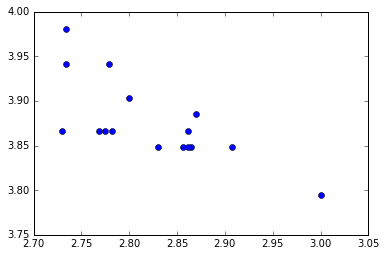

In [29]:
plt.plot(gains, yuki_gains, 'o')